## Correlation Analysis between Climate Change Interest and Total Emissions (2011-2022)

### Overview
This analysis aimed to explore the relationship between public interest in climate change and total emissions over the years 2011-2022, utilizing two datasets: `Timeline_climate_change_preprocessed.csv` for climate change interest and `Fuel.csv` for emissions data.

In [7]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Load the CSV data into DataFrames
timeline_df = pd.read_csv('../Data/Timeline_climate_change_preprocessed.csv')
fuel_df = pd.read_csv('../Data/Fuel.csv')

# Display the first few rows of each dataframe to understand their structure
display(timeline_df.head())

fuel_df.head()


,Climate Change Interest,Date
0,2,2004-01-01
1,3,2004-02-01
2,3,2004-03-01
3,2,2004-04-01
4,2,2004-05-01


,Facility.Id,FRS.Id,Facility.Name,City,State,Primary.NAICS.Code,Year,Industry.Type,Sector,Unit.Name,Fuel.Type,Specific.Fuel.Type,Other.Fuel.Name,Blend.Fuel.Name,Methane.emissions,Nitrous.Oxide.emissions
0,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,2301,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,16.5,20.86
1,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,2302,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,15.0,17.88
2,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec1,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,0.0,0.00
3,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec2,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,0.0,0.00
4,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,2301,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,11.0,11.92


### Data Preprocessing
- **Climate Change Interest Data:** Filtered to include only the years 2011-2022 and aggregated the monthly data to obtain an average yearly interest level.
- **Emissions Data:** Focused on the years 2011-2022, summing Methane and Nitrous Oxide emissions to calculate total emissions for each year.




In [3]:
# Filter the timeline data for years 2011-2022
timeline_df['Date'] = pd.to_datetime(timeline_df['Date'])
timeline_df = timeline_df[(timeline_df['Date'].dt.year >= 2011) & (timeline_df['Date'].dt.year <= 2022)]
timeline_df['Year'] = timeline_df['Date'].dt.year

# Aggregate climate change interest by year
climate_interest_by_year = timeline_df.groupby('Year')['Climate Change Interest'].mean().reset_index()

# Filter and aggregate emissions data for years 2011-2022
fuel_df = fuel_df[(fuel_df['Year'] >= 2011) & (fuel_df['Year'] <= 2022)]

# Assuming Methane and Nitrous Oxide emissions are both significant and can be summed for total emissions
# Adjust as necessary based on the specifics of the emissions data and how they should be combined
fuel_df['Total Emissions'] = fuel_df['Methane.emissions'] + fuel_df['Nitrous.Oxide.emissions']
total_emissions_by_year = fuel_df.groupby('Year')['Total Emissions'].sum().reset_index()

# Merge the two datasets on the year for correlation analysis
merged_data = pd.merge(climate_interest_by_year, total_emissions_by_year, on='Year')
merged_data


,Year,Climate Change Interest,Total Emissions
0,2011,3.333333,1.830149e+07
1,2012,3.333333,1.696893e+07
2,2013,3.500000,1.511086e+07
3,2014,5.166667,1.526481e+07
4,2015,6.416667,1.370896e+07
5,2016,6.833333,1.266573e+07
6,2017,8.583333,1.231620e+07
7,2018,7.000000,1.195788e+07
8,2019,11.500000,1.053109e+07
9,2020,8.166667,8.948122e+06


In [4]:
# Calculate the correlation between climate change interest and total emissions
correlation = merged_data[['Climate Change Interest', 'Total Emissions']].corr()

correlation


,Climate Change Interest,Total Emissions
Climate Change Interest,1.000000,-0.768589
Total Emissions,-0.768589,1.000000


### Visualization
- A heatmap was generated to visually represent the correlation matrix, clearly illustrating the strong negative relationship between the variables.


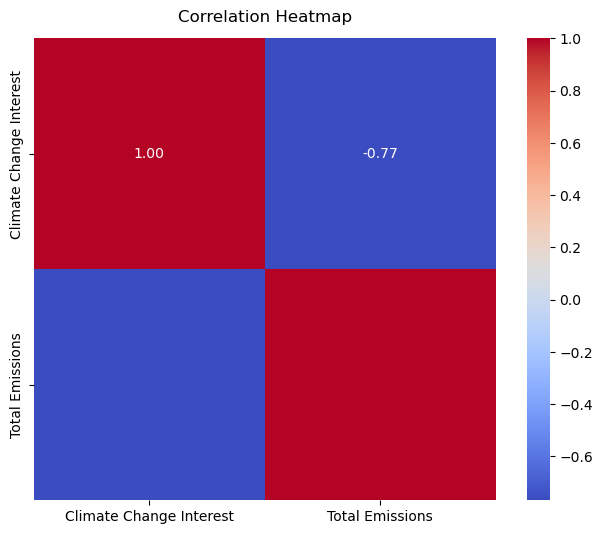

In [8]:
# Generate a correlation matrix
corr_matrix = merged_data[['Climate Change Interest', 'Total Emissions']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()


### Analysis
- A merged dataset was created to align the yearly climate change interest with total emissions.
- The Pearson correlation coefficient was calculated, revealing a strong negative correlation (-0.77) between climate change interest and total emissions.
- A Pearson correlation significance test was conducted, yielding a p-value of 0.0035. This indicates that the observed negative correlation is statistically significant, suggesting a meaningful relationship between increased climate change interest and decreased emissions during the specified period.

In [5]:

# Perform Pearson correlation test
corr_coefficient, p_value = pearsonr(merged_data['Climate Change Interest'], merged_data['Total Emissions'])

corr_coefficient, p_value


(-0.7685890772765102, 0.0034905439430501775)


### Conclusion
The analysis demonstrates a statistically significant negative correlation between public interest in climate change and total emissions, implying that heightened awareness and concern might be associated with emission reduction efforts. However, it's important to note that correlation does not imply causation.
